<h1> S&P 500 Stock Prediction </h1>

In [2]:
# Imports
# Calculation
import numpy as np

# Reading dataframe
import pandas as pd
from datetime import datetime

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Stationarity test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Model
from statsmodels.tsa.arima_model import ARIMA

In [3]:
# Dataset
stocks_df = pd.read_csv("all_stocks_5yr.csv")

<h2> Data Pre-Processing </h2>

<h3> 1: Exploring the Dataset </h3>

In [4]:
# Look at data
stocks_df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [5]:
stocks_df.shape
# 6190340 entries of data

(619040, 7)

In [6]:
stocks_df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
# Number of unique values
stocks_df.nunique()

date        1259
open       49715
high       81499
low        82354
close      51151
volume    586441
Name         505
dtype: int64

<p> There are a total of 505 stocks in the all_stocks dataset. </p>

<h3> 2: Handling Missing Data </h2>

In [8]:
# Check the number of  missing values
stocks_df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [9]:
# Looking at the rows have 'open' null values
stocks_df[stocks_df['open'].isnull()]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


<p> Missing values are replaced with the mean value of each individual stock. </p>

In [10]:
# Replacing null 'open' data with mean values of stock i.e. by 'Name'
namelist_open = list(stocks_df[stocks_df["open"].isnull()]["Name"])

for i in range(len(namelist_open)): 
    # Get the mean
    name = namelist_open[i]
    mean = stocks_df["open"][stocks_df["Name"] == name].mean()
        
    # Replace null values with the mean
    stocks_df["open"][stocks_df["Name"] == name] = stocks_df["open"][stocks_df["Name"] == name].replace(np.NaN, mean)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
# Looking at the rows have 'high' null values
stocks_df[stocks_df['high'].isnull()]
# The same rows have missing 'low' and 'high' values

,date,open,high,low,close,volume,Name
82949,2017-07-26,60.083838,NaN,NaN,69.0842,3,BHF
165857,2016-01-12,81.420523,NaN,NaN,88.5500,0,DHR
239832,2016-07-01,61.095720,NaN,NaN,49.5400,0,FTV
434502,2016-01-12,51.168482,NaN,NaN,52.4300,0,O
478594,2015-06-09,381.861515,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,23.721156,NaN,NaN,41.5600,0,UA
581906,2015-05-12,101.599640,NaN,NaN,124.0800,569747,VRTX
598236,2015-06-26,51.209062,NaN,NaN,61.9000,100,WRK


In [12]:
# Replacing null 'open' data with mean values of stock i.e. by 'Name'
namelist_high = list(stocks_df[stocks_df["high"].isnull()]["Name"])

for i in range(len(namelist_high)): 
    # Get the mean
    name = namelist_high[i]
    mean_high = stocks_df["high"][stocks_df["Name"] == name].mean()
    mean_low = stocks_df["low"][stocks_df["Name"] == name].mean()
        
    # Replace null values with the mean
    stocks_df["high"][stocks_df["Name"] == name] = stocks_df["high"][stocks_df["Name"] == name].replace(np.NaN, mean)
    stocks_df["low"][stocks_df["Name"] == name] = stocks_df["low"][stocks_df["Name"] == name].replace(np.NaN, mean)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [13]:
# Confirm that there are no more missing values
stocks_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
# To check for duplication (but unneessary since stock data can be repeated)
for col in stocks_df.columns: 
    print("Column: {:8} {:>10}".format(col, stocks_df[col].duplicated().sum()))

Column: date         617781
Column: open         569316
Column: high         537540
Column: low          536685
Column: close        567889
Column: volume        32599
Column: Name         618535


<h3> 3: Converting Dates to datetime Format </h3>

In [15]:
def convertToDate(date):
    new_date = datetime.strptime(date, '%Y-%m-%d')
    return new_date

stocks_df.loc[:,'date'] = stocks_df.loc[:,'date'].apply(convertToDate)

In [16]:
stocks_df['date'][0].now()

Timestamp('2019-04-11 10:28:02.315594')

<h2> Exploratory Data Analysis </h2>

In [18]:
aal_df = stocks_df[stocks_df['Name'] == 'AAL']

In [19]:
aal_df.nunique()

date      1259
open      1011
high      1050
low       1059
close     1049
volume    1259
Name         1
dtype: int64

In [20]:
len(aal_df)

1259

In [21]:
aal_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [22]:
aal_df.count()

date      1259
open      1259
high      1259
low       1259
close     1259
volume    1259
Name      1259
dtype: int64

In [23]:
aal_open_df = aal_df[['date','open']]

In [24]:
aal_open_df.head()

,date,open
0,2013-02-08,15.07
1,2013-02-11,14.89
2,2013-02-12,14.45
3,2013-02-13,14.30
4,2013-02-14,14.94


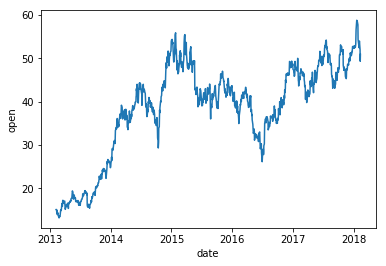

In [25]:
sns.lineplot(data=aal_open_df, x = 'date', y = 'open')

In [26]:
aal_high_df = aal_df[['date','high']]

In [27]:
aal_high_df.head()

,date,high
0,2013-02-08,15.12
1,2013-02-11,15.01
2,2013-02-12,14.51
3,2013-02-13,14.94
4,2013-02-14,14.96


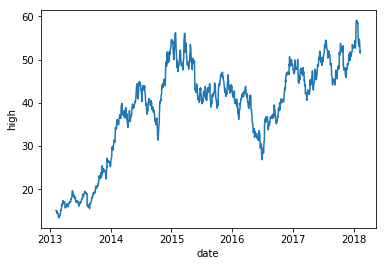

In [28]:
sns.lineplot(data=aal_high_df, x = 'date', y = 'high')

In [29]:
aal_low_df = aal_df[['date','low']]

In [30]:
aal_low_df.head()

,date,low
0,2013-02-08,14.63
1,2013-02-11,14.26
2,2013-02-12,14.10
3,2013-02-13,14.25
4,2013-02-14,13.16


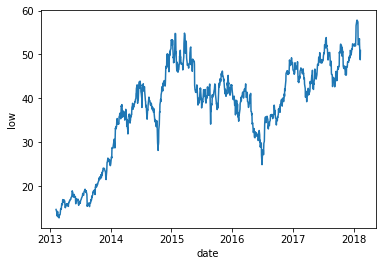

In [31]:
sns.lineplot(data=aal_low_df, x = 'date', y = 'low')

In [32]:
aal_close_df = aal_df[['date','close']]

In [33]:
aal_close_df.head()

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99


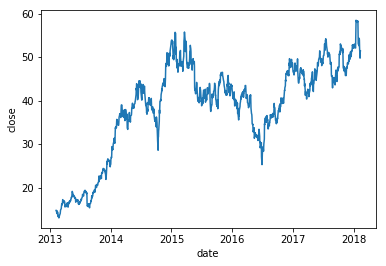

In [34]:
sns.lineplot(data=aal_close_df, x = 'date', y = 'close')

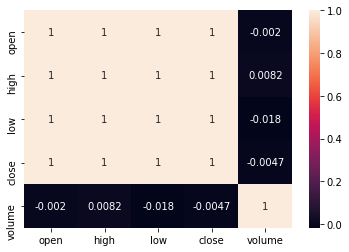

In [35]:
sns.heatmap(aal_df.corr(), annot = True)

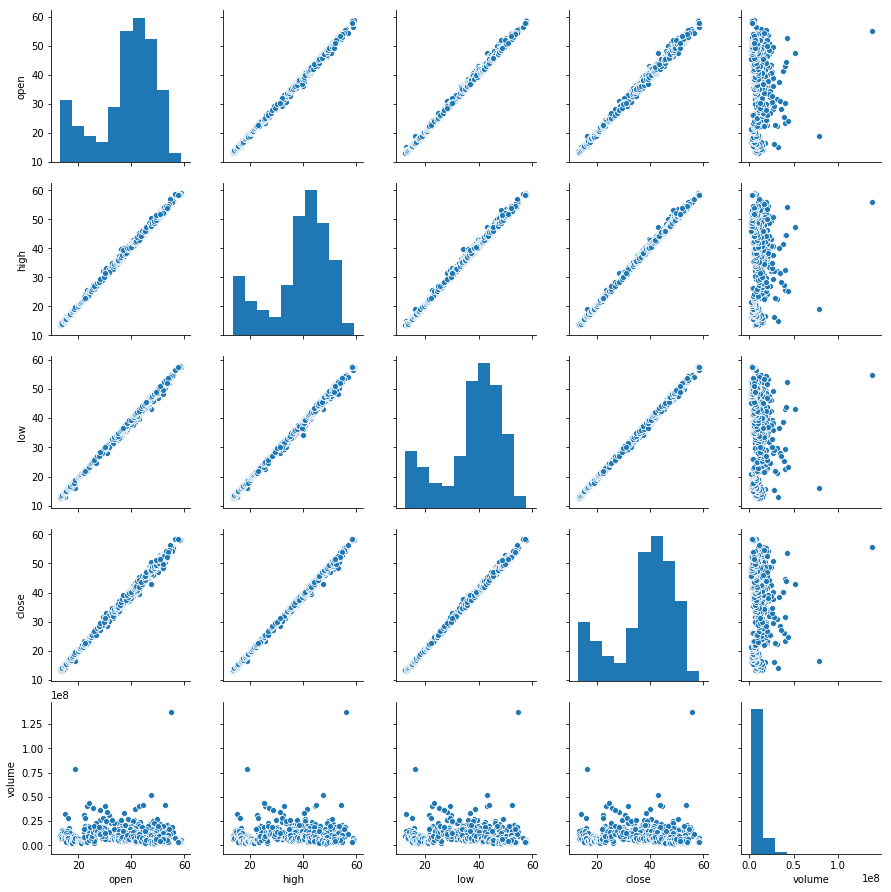

In [36]:
sns.pairplot(aal_df)

In [37]:
aal_df.corr()

,open,high,low,close,volume
open,1.000000,0.999059,0.998799,0.997690,-0.001996
high,0.999059,1.000000,0.998724,0.998964,0.008243
low,0.998799,0.998724,1.000000,0.998957,-0.017993
close,0.997690,0.998964,0.998957,1.000000,-0.004733
volume,-0.001996,0.008243,-0.017993,-0.004733,1.000000


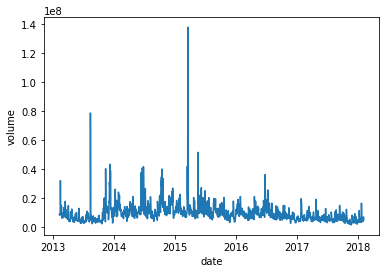

In [38]:
sns.lineplot(data=aal_df, x = 'date', y = 'volume')

<h2> Time Series Modelling </h2>
<p> Time series is a sequence of well-defined data points measured at consistent itme intervals over a period of time </p>
    
<h3> Time Series: Stationary </h3>
<p> A stationary time series is one whose mean, variance, autocovariance/autocorrelation, etc. are all constant over time. </p>
<ul>
    <li> Mean: E(x) is not conditional on t </li>
    <li> Variance: Var(x) is not conditional on t </li>
    <li> Autocovariance (k-order): Cov(xt, x(k-t)) is only conditional on k, not t </li>
</ul>

<h3> Types of Stationarity </h3>
<ul>
    <li> <strong> Strict Stationary:</strong> A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The <strong> aim is to convert a non-stationary series into a strict stationary series for making predictions </strong>. </li>
    <li> <strong> Trend Stationary: </strong> A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary. </li>
    <li> <strong> Difference Stationary: </strong> A time series that can be made strict stationary by differencing falls under difference stationary. The Augmented Dickey Fuller (ADF) test is also known as a difference stationarity test. </li>
</ul>

<p> Both the KPSS test and ADF test will be applied below, to ascertain if the series is truly stationary. There are four possible outcomes of applying these stationarity tests.
    <ul>
        <li> <strong> Case 1: </strong> Both tests conclude that the series is not stationary -> series is not stationary </li>
        <li> <strong> Case 2: </strong> Both tests conclude that the series is stationary -> series is stationary </li>
        <li> <strong> Case 3: </strong> KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary </li>
        <li> <strong> Case 4: </strong> KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary </li>

<h3> 1: Identifying Seasonality </h3>
<h4> Visual Test </h4>
<p> Plot the data and determine if the properties of the series are changing with time or not. </p>

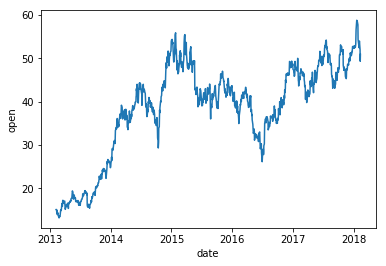

In [39]:
# Visualise open data
sns.lineplot(data = aal_open_df, x = 'date', y= 'open')

<p> It's unclear from the time series plot alone whether there is seasonality. Thus, the Augmented Dickey Fuller (ADF) Test is used to determine if the data exhibits seasonality. </p>

<h4> Augmented Dickey Fuller (ADF) Test </h4>
<p> The ADF Test can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are: 
<ul>
    <li> Null Hypothesis: The series has a unit root (value of a =1) </li>
    <li> Alternate Hypothesis: The series has no unit root. </li>
</ul>
If we fail to reject the null hypothesis, we can say that the series is non-stationary. </p>

In [40]:
# Define function for ADF test (to be used for all data)
def adf_test(data):
    result = adfuller(data)
    print ('Results of Dickey-Fuller Test:')
    print('ADF Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Number of Observations Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [41]:
# ADF test for open data
print("ADF TEST: OPEN")
adf_test(aal_df['open'])

ADF TEST: OPEN
Results of Dickey-Fuller Test:
ADF Test Statistic: -2.009707
p-value: 0.282333
Number of Observations Used: 1258.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<p> <strong> Test for stationarity: </strong> If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary) </p>

<p> <strong> Results: </strong> Since the test statistic > critical values, we do not reject the null hypothesis. We conclude that the series is non-stationary. </p>

In [42]:
print("ADF TEST: HIGH")
# ADF test for high data
adf_test(aal_df['high'])

ADF TEST: HIGH
Results of Dickey-Fuller Test:
ADF Test Statistic: -2.039421
p-value: 0.269560
Number of Observations Used: 1257.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [43]:
print("ADF TEST: LOW")
# ADF test for low data
adf_test(aal_df['low'])

ADF TEST: LOW
Results of Dickey-Fuller Test:
ADF Test Statistic: -2.115520
p-value: 0.238320
Number of Observations Used: 1257.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [44]:
# ADF test for close data
print("ADF TEST: CLOSE")
adf_test(aal_df['close'])

ADF TEST: CLOSE
Results of Dickey-Fuller Test:
ADF Test Statistic: -2.066675
p-value: 0.258124
Number of Observations Used: 1257.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<h4> Results of ADF Test </h4>
<p> For <strong> all </strong> the data series, the test statistic > critical values, we do not reject the null hypothesis. We conclude that the series is non-stationary (or more specifically, non-difference stationary). Hence, we will need to stationarise the data to counter the changing variance before we can develop our time series model. </p>

<h4> Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test </h4>
<p> The null and alternate hypothesis of this test are: 
<ul>
    <li> Null Hypothesis: The process is trend stationary </li>
    <li> Alternate Hypothesis: The series has a unit root (series is not stationary). </li>
</ul>
Do note that the null and alternative hypothesis of the KPSS are the opposites of ADF. Here, we can say that the series is non-trend stationary if we reject the null hypothesis. </p>

In [45]:
# Define function for KPSS test (to be used for all data)
def kpss_test(data):
    result = kpss(data, regression='c')
    print ('Results of Kwiatkowski-Phillips-Schmidt-Shin Test:')
    print('ADF Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Number of Lags Used: %f' % result[2])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

In [46]:
print("KPSS TEST: OPEN")
kpss_test(aal_df['open'])

KPSS TEST: OPEN
Results of Kwiatkowski-Phillips-Schmidt-Shin Test:
ADF Test Statistic: 2.919384
p-value: 0.010000
Number of Lags Used: 23.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [47]:
print("KPSS TEST: HIGH")
kpss_test(aal_df['high'])

KPSS TEST: HIGH
Results of Kwiatkowski-Phillips-Schmidt-Shin Test:
ADF Test Statistic: 2.904765
p-value: 0.010000
Number of Lags Used: 23.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [48]:
print("KPSS TEST: LOW")
kpss_test(aal_df['low'])

KPSS TEST: LOW
Results of Kwiatkowski-Phillips-Schmidt-Shin Test:
ADF Test Statistic: 2.945550
p-value: 0.010000
Number of Lags Used: 23.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [49]:
print("KPSS TEST: CLOSE")
kpss_test(aal_df['close'])

KPSS TEST: CLOSE
Results of Kwiatkowski-Phillips-Schmidt-Shin Test:
ADF Test Statistic: 2.923165
p-value: 0.010000
Number of Lags Used: 23.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<h4> Results of KPSS Test </h4>
<p> For <strong> all </strong> the data series, the test statistic > critical values, we do not reject the null hypothesis. We conclude that the series is trend-stationary. </p>

<h4> Summary </h4>
<p> Thus, our series data all fall in Case 3 (KPSS = stationary and ADF = not stationary). Hence, we conclude that the data is trend stationary, and we need to remove the trend (stationarise) to make the series strict stationary. </p>

<h3> 2: Stationarise </h3>
<h4> Countering Changing Variance </h4>
<p> Take the logarithm or square root of the series to stabilise the variance. </p>

In [50]:
aal_open_df['open_log'] = np.log(aal_open_df['open'])
aal_open_df['open_logdiff'] = aal_open_df['open_log'] - aal_open_df['open_log'].shift(1)
aal_open_df['open_logdiff'] = aal_open_df['open_logdiff'].dropna()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

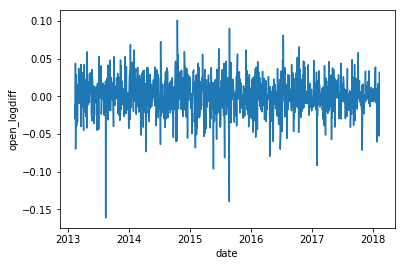

In [51]:
aal_open_stationarise = aal_open_df[["date", "open_logdiff"]]
sns.lineplot(data = aal_open_stationarise, x = 'date', y = 'open_logdiff')

In [52]:
# Perform the AFL test again to check that data is stationary
adf_test(aal_open_stationarise['open_logdiff'].dropna())

Results of Dickey-Fuller Test:
ADF Test Statistic: -35.030583
p-value: 0.000000
Number of Observations Used: 1257.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<p> Since the test statistic < critical values, we reject the null hypothesis and conclude that the series is stationary. </p>

<h3> 3: Modelling - Autoregressive Integrated Moving Average(ARIMA) </h3>

In [73]:
model = ARIMA(aal_open_stationarise['open_logdiff'].dropna(), order = (1, 1, 1))
model_fit = model.fit()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [66]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.open_logdiff   No. Observations:                 1257
Model:                 ARIMA(2, 1, 1)   Log Likelihood                2926.643
Method:                       css-mle   S.D. of innovations              0.024
Date:                Thu, 11 Apr 2019   AIC                          -5843.286
Time:                        10:33:43   BIC                          -5817.603
Sample:                             1   HQIC                         -5833.634
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.328e-06   1.72e-05     -0.077      0.939   -3.51e-05    3.24e-05
ar.L1.D.open_logdiff     0.0252      0.154      0.164      0.870      -0.276       0.326
ar.L2.D.open

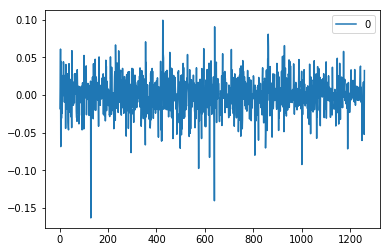

In [92]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

In [98]:
prediction = model_fit.predict(1, len(aal_open_stationarise["open_logdiff"]) + 100, typ = "levels")

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


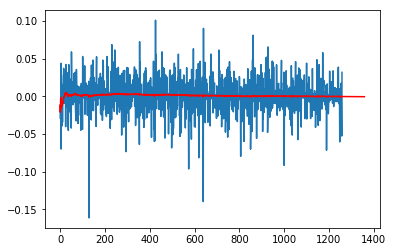

In [99]:
plt.plot(aal_open_stationarise["open_logdiff"])
plt.plot(prediction, color = "red")